In [4]:
import arviz as az
import matplotlib.pyplot as plt 
import numpy as np 
import pymc3 as pm 
import theano.tensor as tt 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Sampling 4 chains for 1_500 tune and 2_000 draw iterations (6_000 + 8_000 draws total) took 13 seconds.


array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>]], dtype=object)

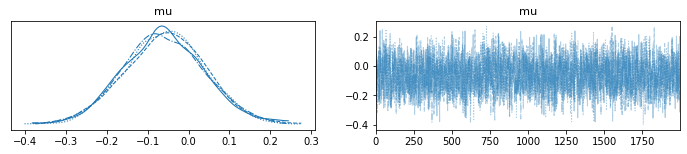

In [6]:
with pm.Model() as model:
    prior_mu = pm.Normal("mu", mu=0, sigma=1)
    obs_x = pm.Normal("obs_x", mu=prior_mu, sigma=1,observed = np.random.randn(100))
    idata = pm.sample(draws=2000, tune=1500, return_inferencedata=True)
az.plot_trace(idata)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Sampling 4 chains for 1_500 tune and 2_000 draw iterations (6_000 + 8_000 draws total) took 11 seconds.


array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

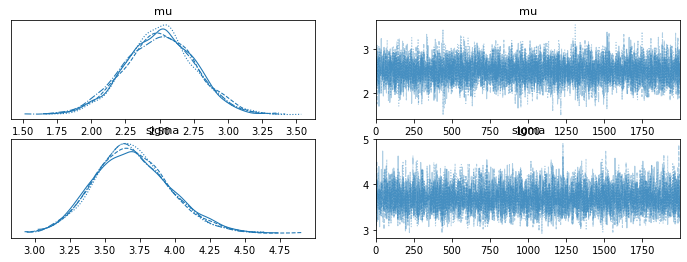

In [8]:
V = 10
dat = np.random.randn(100) + 5
with pm.Model() as model:
    prior_sigma = pm.InverseGamma("sigma", alpha = 1, beta = 1)
    prior_mu = pm.Normal("mu", mu = 0, sigma = prior_sigma/V)
    obs_x = pm.Normal("obs_x", mu = prior_mu, sigma = prior_sigma, observed = dat)
    idata = pm.sample(draws=2000,tune=1500,return_inferencedata=True)
az.plot_trace(idata)
